# Loading, Polynomials and Scaling data

Machine Learning algorithms often use an algorithm to converge to an optimal solution, much like gradient descent. A common problem when values between features differ greatly is that the coefficient learned for one feature is learned quickly and the other slow. This can hinder learning when it causes numerical instability or oscillation when coefficients are iteratively updated. This applies to linear regression, SVM and kNN. For decision trees it does not help much, but nevertheless it is a good practice to always apply. 


### Loading pickled data

The dam dataset comes in a file that was pickled in Python. Pickling is a way to write values of Python variables to file so that you can load them from file again. Pickling is very fast. In this case the dataset was already split in a train and vaidation set.

In [29]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [18]:
train_X, valid_X, test_X, all_X, train_y, valid_y, test_y, all_y = range(8)
with open("/data/datasets/dam_water_data.pickle", "rb") as myfile:
    train_X, valid_X, test_X, all_X, train_y, valid_y, test_y, all_y = pickle.load(myfile)



In fact, what the data objects in the ml library do, is just wrap the data in one object, to minimize the number of parameters you need to pass. Instead of you just create an object and assign train_X, train_y, valid_X and valid_y to it, you will find that is all the models in the ml library need. All the other code in the data loader is just some tools to balance the data, scale the data, add a bias column and plot the data. You can easily write that code yourself.

In [19]:
class O: pass

data = O()
data.train_X = train_X
data.train_y = train_y
data.valid_X = valid_X
data.valid_y = valid_y

from ml import linear_regression_ne
model = linear_regression_ne(data)
model.train()

0 0.00s train loss: 44.747813 valid loss: 58.867636



### Add polynomials

You can add polynomials using a function in SKLearn. You have to supply the degree and for most models turn of the include_bias. 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [22]:
train_X2 = poly.fit_transform(train_X)

In [23]:
valid_X2 = poly.fit_transform(valid_X)

In [24]:
train_X2[:2]

array([[      -15.93675813,       253.98025981,     -4047.62197142,
            64505.97237558,  -1028016.07993428],
       [      -29.15297922,       849.89619724,    -24777.00617497,
           722323.54608423, -21057883.32711544]])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(train_X2, train_y);

In [28]:
model.predict(train_X2)

array([ 1.39055599,  2.18193162, 35.33825261, 36.05218238,  3.28937565,
        1.70441824, 14.56450771,  2.49778465,  4.54738248,  2.93366893,
        7.70914235, 22.40186929])

create an array of values from -50 to 50 and apply the same polynomials to plot the function line

In [30]:
x = poly.fit_transform(np.arange(-50,50).reshape(-1,1))

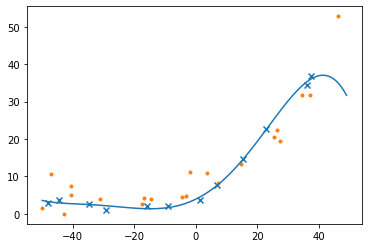

In [31]:
plt.scatter(train_X, train_y, marker='x')
plt.scatter(valid_X, valid_y, marker='.')
plt.plot(x[:,0], model.predict(x));

### Scale

Machine Learning algorithms often use an algorithm to converge to an optimal solution, much like gradient descent. A common problem when values between features differ greatly is that the coefficient learned for one feature is learned quickly and the other slow. This can hinder learning when it causes numerical instability or oscillation when coefficients are iteratively updated. This applies to linear regression, SVM and kNN. For decision trees it does not help much, but nevertheless it is a good practice to always apply. 

In [32]:
poly = PolynomialFeatures(degree=14, include_bias=False)
train_X2 = poly.fit_transform(train_X)
valid_X2 = poly.fit_transform(valid_X)
model = LinearRegression()
model.fit(train_X2, train_y);

In the plot below you can see numerical instability. The function should be able tp fit through the points but it doesn't because of numerical instability.

(-1.0, 60.0)

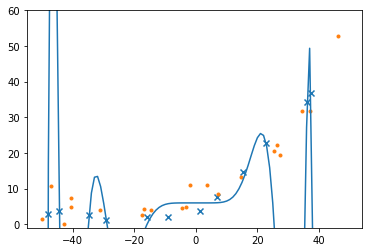

In [33]:
x = poly.fit_transform(np.arange(-50,50).reshape(-1,1))

plt.scatter(train_X, train_y, marker='x')
plt.scatter(valid_X, valid_y, marker='.')
plt.plot(x[:,0], model.predict(x))
plt.ylim(-1,60)


A simple solution is to scale/normalize/standardize your data. Most commonly, the data is converted to a z-distribution which has a zero mean and variance of one. For this we can use the StandardScaler in SKLearn. 

Note that it is important to use the exact same mean and variance for scaling the training, validation and test set!!! Therefore, make sure you fit the scaler on the training set en only transform the validation and test set.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [38]:
scaler.fit(train_X2) # determine the mean and variance on the training set
train_X3 = scaler.transform(train_X2) # normalize the training set
valid_X3 = scaler.transform(valid_X2) # normalize the validation set

In [39]:
model = LinearRegression()
model.fit(train_X3, train_y);

You should see that scaling reduces numerical instability, but also reduces the absurd coeffients we obtained on the unscaled data. Notice however, that the model is still overfit, as we get a connecting the dots solution.

(-1.0, 60.0)

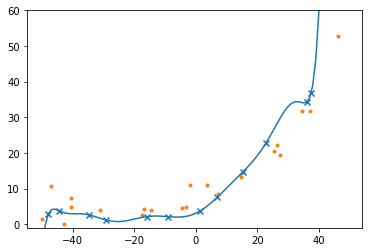

In [41]:
x = poly.fit_transform(np.arange(-50,50).reshape(-1,1))
x3 = scaler.transform(x)

plt.scatter(train_X, train_y, marker='x')
plt.scatter(valid_X, valid_y, marker='.')
plt.plot(x[:,0], model.predict(x3))
plt.ylim(-1,60)